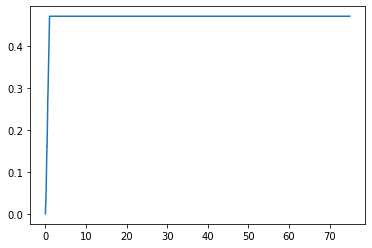

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def signo(x):
    x = np.where(x > 0, 1, -1)
    return x

img_ancho = 10

# generacion de patrones
w = np.zeros((img_ancho**2, img_ancho**2))
p_max = 0

# generacion de patrones ruidosos
x = 2*np.random.binomial(1, 0.5, (img_ancho**2, 2)) - 1
w = np.zeros((img_ancho**2, img_ancho**2))

for i in range(len(x[0, :])):
    w += np.outer(x[:, i], x[:, i])
    np.fill_diagonal(w, 0)

# vector que determina la cantidad de sinapsis a eliminar
h = np.arange(0, (3*w.size)//4, 2)
h1 = np.argwhere(w != 0)
h1 = np.random.permutation(h1)
p_error = np.zeros(h.shape)

for i in range(len(h)):
    w1 = w.copy()
    w1[:h[i]] = 0

    for j in range(len(x[0, :])):
        p_error[i] += np.sum(np.mean(signo(np.dot(w1, x[:, j])) != x[:, j]))
    p_error[i] /= len(x[0, :])


plt.plot((h/w.size)*100,p_error)
plt.show()